<a href="https://colab.research.google.com/github/cminy/cminydev22/blob/main/actd_bch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DESCRIPTION : Wine Quality Data Set으로 5장 예제풀기
# -*- coding: utf-8 -*-
!pip install stemgraphic

import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import stemgraphic
import scipy

# 구글드라이브 접근 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 내 모듈 불러오기
!pip install import_ipynb 
import import_ipynb

# Authenticate Google Drive Access
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Linking Colab Notebook to the Module
module = drive.CreateFile({'id':'1BTjAAGl6LSGXUjJJNQDCNGKvj57jX5gk'})
module.GetContentFile('actd_mergeadd.ipynb')
from actd_mergeadd import MergeManager


# csv파일로 저장된 data set 불러오기
winedf = MergeManager().findmerged('wineAll.csv')

In [ ]:
# 와인데이터에서 랜덤으로 30개 뽑아오기
df = winedf.sample(n=30, random_state=20).reset_index(drop=True)
# df_col = sorted(list(df.columns))
# df_col
df.rename(columns={"Unnamed: 0": "_idx"}, inplace=True)
df.head(5)

,_idx,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vinoCate
0,253,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3,white
1,1188,7.1,0.21,0.30,1.4,0.037,45.0,143.0,0.99320,3.13,0.33,9.9,6,white
2,379,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8,6,red
3,1063,6.7,0.26,0.26,4.1,0.073,36.0,202.0,0.99560,3.30,0.67,9.5,5,white
4,1242,9.0,0.40,0.41,2.0,0.058,15.0,40.0,0.99414,3.22,0.60,12.2,6,red


# 예제 5.1.1
랜덤으로 뽑은 와인데이터에서 와인 종류(레드/화이트)별 카운트하고 막대그래프 그리기


In [ ]:
cr = pd.crosstab(index=df['vinoCate'], columns="count")
cr

col_0,count
vinoCate,
red,4
white,26


# 예제 5.1.2 (a)

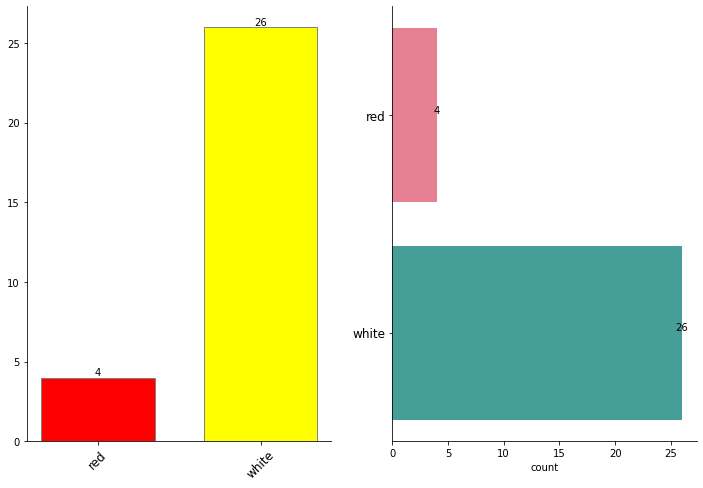

In [ ]:
y_pos = np.arange(len(cr))
x_pos = ['red', 'white']

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.bar(y_pos, cr['count'], color=['r', 'yellow'], width=0.7, edgecolor='grey')
plt.xticks(y_pos, x_pos, fontsize=12, rotation=45)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
for i in range(0, len(x_pos)):
    plt.text(i, cr['count'][i], '{}'.format(
        cr['count'][i]), fontsize=10, horizontalalignment='center', verticalalignment='bottom')

plt.subplot(1, 2, 2)
#plt.barh(y_pos, cr['count'], color=['red', 'yellow'])
sns.barplot(x=cr['count'], y=x_pos, palette='husl')
plt.yticks(y_pos, x_pos, fontsize=12)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
for i in range(0, len(x_pos)):
    plt.text(cr['count'][i], i, '{}'.format(
        cr['count'][i]), fontsize=10, horizontalalignment='center', verticalalignment='bottom')

# 예제 5.1.3 (a)

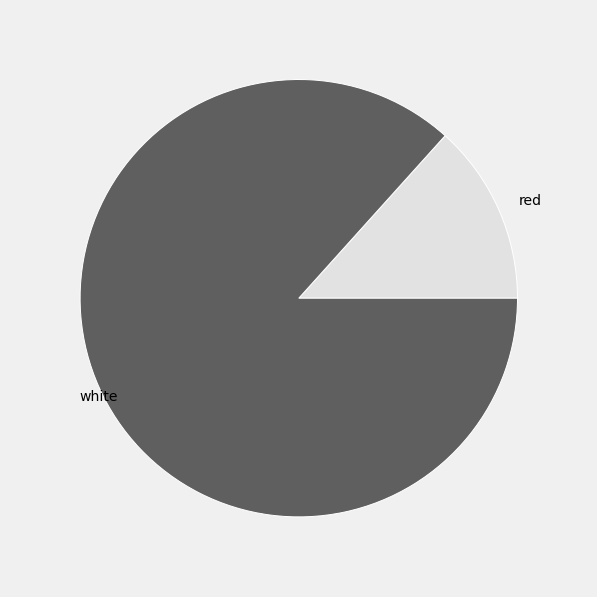

In [ ]:
plt.style.use('fivethirtyeight')
colors = plt.get_cmap('Greys')(np.linspace(0.2, 0.7, len(cr)))
fig, ax = plt.subplots()
ax.pie(cr['count'], labels=x_pos, colors=colors, radius=3, center=(
    4, 4), wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)
ax.set(xlim=(0, 8), ylim=(0, 8))
plt.show()

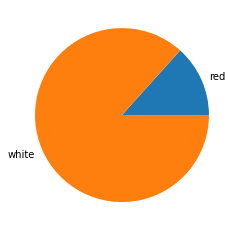

In [ ]:
# - 다른 방법으로 그리기
plt.pie(cr['count'], labels=x_pos)
plt.show()

# 예제 5.1.3(b)
레드와인 평점 비교


In [ ]:
tempdf = winedf.loc[winedf['vinoCate'] == 'red']
df2 = pd.crosstab(index=tempdf['quality'], columns="count")
df2

col_0,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


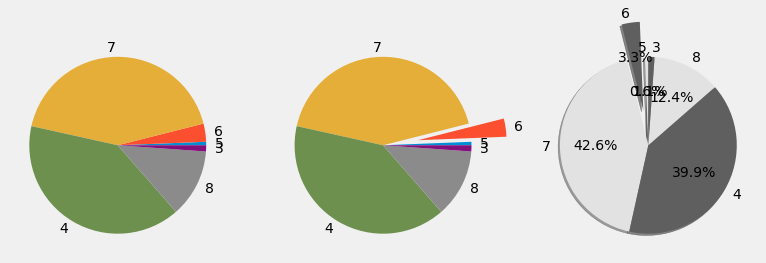

In [ ]:
plt.rcParams['figure.figsize'] = [12, 10]
wine_Q = np.array(tempdf['quality'].unique())
wine_Qcount = np.array(df2['count'])
y_pos = np.arange(len(wine_Q))

explode = (0.0, 0.4, 0.0, 0.0, 0.0, 0.0)
plt.subplot(1, 3, 1)
plt.pie(wine_Qcount, labels=wine_Q)
plt.subplot(1, 3, 2)
plt.pie(wine_Qcount, labels=wine_Q, explode=explode)
plt.subplot(1, 3, 3)
plt.pie(wine_Qcount, labels=wine_Q, explode=explode,
        colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.show()

# 예제 5.1.4

Text(0.5, 0, 'Quality')

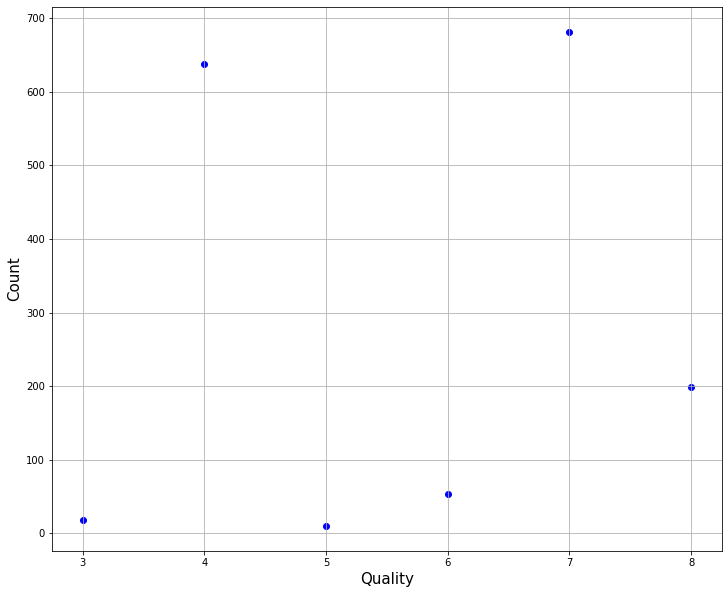

In [ ]:
plt.grid()
plt.scatter(wine_Q, wine_Qcount, color='b')
plt.ylabel('Count', size=15)
plt.xlabel('Quality', size=15)

# 예제 5.2.1 줄기-잎 그림
df에서 'free sulfur dioxide(유리이산화황)'  이용

In [ ]:
x = np.array(df['free sulfur dioxide'])
x

array([ 5., 45., 24., 36., 15., 28., 22., 28., 16., 52., 29., 30.,  6.,
       38., 40., 48., 47., 58., 20., 56., 45., 10., 34., 26., 98., 39.,
       15., 13., 50., 45.])

(<Figure size 540x234 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fcc6bb65090>)

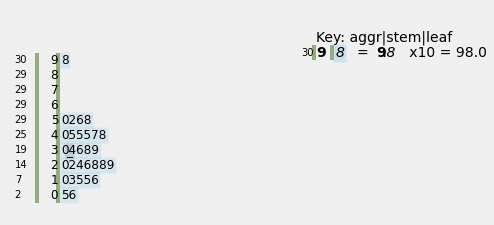

In [ ]:
stemgraphic.stem_graphic(x, scale=10)

# 예제 5.2.2 상자그림

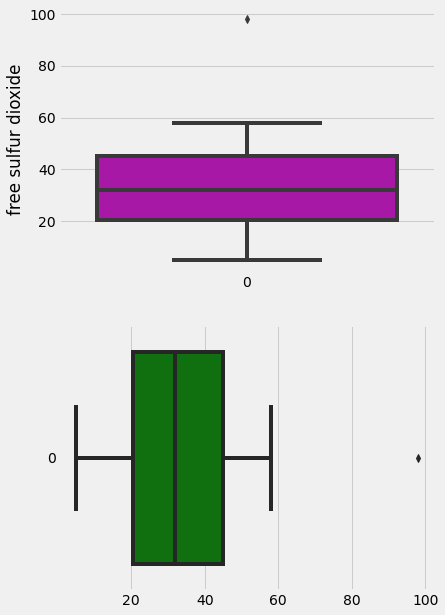

In [ ]:
plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
sns.boxplot(data=x, orient="v", color='m')
plt.ylabel('free sulfur dioxide')
plt.subplot(2, 1, 2)
sns.boxplot(data=x, orient="h", color='g')
plt.show()

<Figure size 288x432 with 0 Axes>

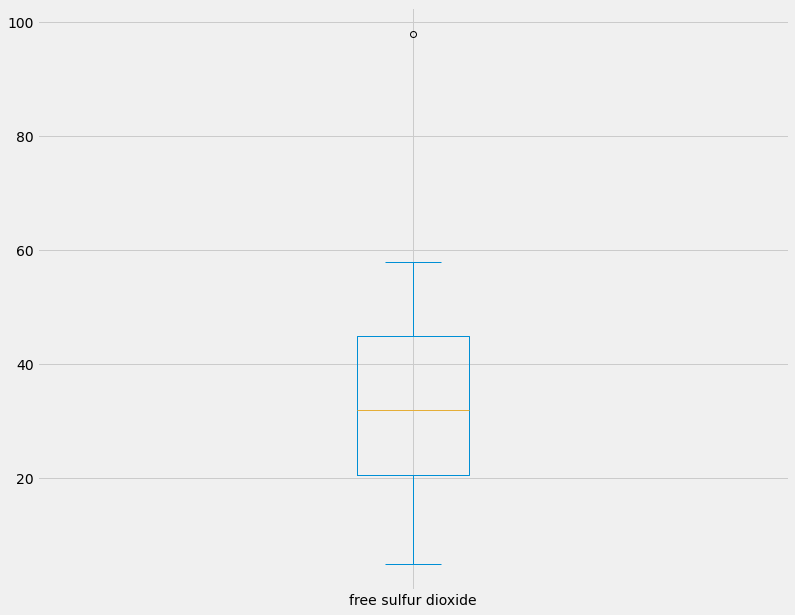

In [ ]:
# - 다른방식으로 구현 해보기
plt.figure(figsize=(4, 6))
df.plot(kind='box', y='free sulfur dioxide')

In [ ]:
np.percentile(x,[0,25,50,75,100])

array([ 5. , 20.5, 32. , 45. , 98. ])

- 중앙값 median(50%) : 30 근처
- 최소값은 약 5점 근처
- 1사분위수(25%) 20점근처
- 3사분위수(75%) 45점근처
- 4사분위는 60점근처
- 최대값은 100근처

# 예제 5.2.3 (a)(b) 정규분포로부터 50개 난수

In [ ]:
y = scipy.stats.norm.rvs(loc=0, scale=1, size=50)
y

array([ 1.01012718,  0.92001793, -0.19505734,  0.80539342, -0.70134443,
       -0.53722302,  0.15626385, -0.19022103, -0.44873803, -0.67244804,
       -0.55749472,  0.93916874, -1.94332341,  0.35249436, -0.23643695,
        0.7278135 ,  0.51507361, -2.78253447,  0.58464661,  0.32427424,
        0.02186284, -0.46867382,  0.85328122, -0.41302931,  1.83471763,
        0.56438286,  2.13782807, -0.785534  , -1.75592564,  0.7147896 ,
        0.85270406,  0.0353601 , -1.53879325, -0.44789518,  0.61798553,
       -0.18417633, -0.11598519, -0.17545897, -0.93391466, -0.53302033,
       -1.42655542,  1.76795995, -0.47537288,  0.47761018, -1.02188594,
        0.79452824, -1.87316098,  0.92061512, -0.03536792,  2.11060505])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



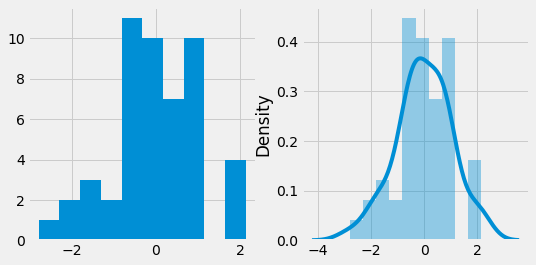

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(y)
plt.subplot(1, 2, 2)
sns.distplot(y, bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



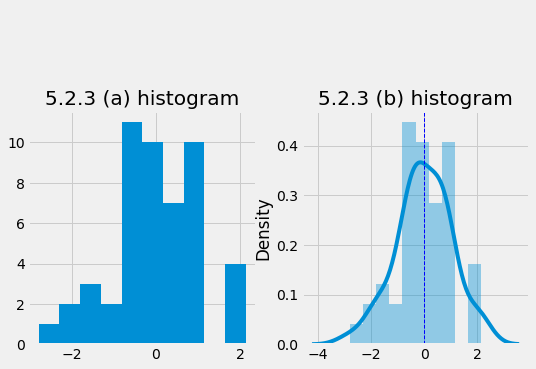

In [ ]:
# - subplot 다른 방식으로 나누기
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(8, 4))
# fig.suptitle("Example 5.2.3", fontsize=15, fontweight='bold')
fig.get_axes()[0].annotate('Example 5.2.3', (0.55, 1.2),
                           xycoords='figure fraction', ha='center', fontsize=15)
ax0.hist(y)
ax0.set(title='5.2.3 (a) histogram')
sns.distplot(y, bins=10)
ax1.set(title='5.2.3 (b) histogram')
ax1.axvline(x=y.mean(), color='b', label='Average',
            linestyle='--', linewidth=1)

# 예제 5.2.7(a)

2.009575234489209
(-0.30315536304021307, 0.2867526697828615)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.48675266978286147, 0.4, '0.3')

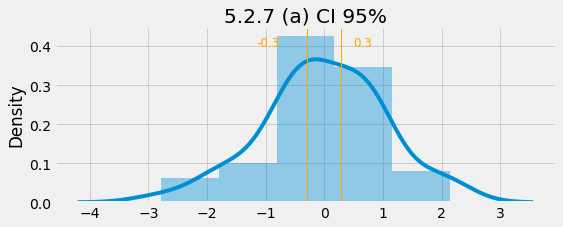

In [ ]:
n = len(y)
m = np.mean(y)
sd = np.std(y, ddof=1)
cri = scipy.stats.t.ppf(df=n-1, q=0.975)  # 신뢰구간 95%니까 0.025씩
lower = m - cri * sd / np.sqrt(n)
upper = m + cri * sd / np.sqrt(n)

print(cri)
interval = scipy.stats.t.interval(0.95, n-1, m, sd/np.sqrt(n))
print(interval)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(8, 3))
ax.set(title='5.2.7 (a) CI 95%')
sns.distplot(y, bins=5)
ax.axvline(x=lower, label='Lower Limit', linewidth=1, color='orange')
plt.text(lower - 0.85, 0.4,
         '{:.1f}'.format(lower), fontsize=12, color='orange')
ax.axvline(x=upper, label='Upper Limit', linewidth=1, color='orange')
plt.text(upper + 0.2, 0.4,
         '{:.1f}'.format(upper), fontsize=12, color='orange')

# 예제 5.2.7(d)

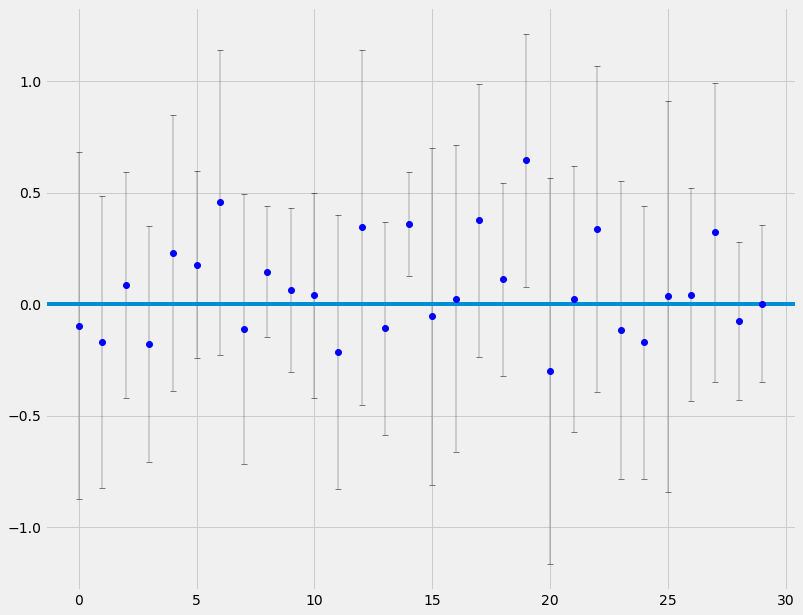

In [ ]:
population = scipy.stats.norm(loc=0, scale=1)
time = np.array(np.arange(30))


def calc_sample_mean_ci(size, n_trial):
    sample_mean_arr = np.zeros(n_trial)
    ci_lower_arr = np.zeros(n_trial)
    ci_upper_arr = np.zeros(n_trial)
    int_arr = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_arr[i] = np.mean(sample)
        sd = np.std(sample, ddof=1) / np.sqrt(size)
        ci_lower_arr[i] = np.mean(sample) - 1.96 * sd
        ci_upper_arr[i] = np.mean(sample) + 1.96 * sd
        int_arr[i] = 1.96 * sd
    return(sample_mean_arr, ci_lower_arr, ci_upper_arr, int_arr)


np.random.seed(1)
m, lo, up, int_l = calc_sample_mean_ci(size=10, n_trial=30)
plt.errorbar(time, m, yerr=int_l, fmt="bo", linewidth=1,
             elinewidth=0.3, ecolor='k', capsize=3, capthick=0.5)
plt.axhline(y=0)

# FIN.